# 주제 : 자동으로 모은 데이터는 분석하기 어렵다면서? 자동으로 모은 중고 자동차 데이터를 분석해보자!
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Used Cars Dataset을 사용합니다.
    - 파일은 한 개이며, 각각의 컬럼은 아래와 같습니다.
    
    - vehicles.csv
    id : 중고차 거래의 아이디
    url : 중고차 거래 페이지
    region : 해당 거래의 관리 지점
    region_url : 거래 관리 지점의 홈페이지
    price : 기입된 자동차의 거래가
    year : 거래가 기입된 년도
    manufacturer : 자동차를 생산한 회사
    model : 자동차 모델명
    condition : 자동차의 상태
    cylinders : 자동차의 기통 수
    fuel : 자동차의 연료 타입
    odometer : 자동차의 운행 마일 수
    title_status : 자동차의 타이틀 상태 (소유주 등록 상태)
    transmission : 자동차의 트랜스미션 종류
    vin : 자동차의 식별 번호 (vehicle identification number)
    drive : 자동차의 구동 타입
    size : 자동차 크기
    type : 자동차의 일반 타입 (세단, ...)
    paint_color : 자동차 색상
    image_url : 자동차 이미지
    description : 세부 설명
    county : 실수로 생성된 미사용 컬럼
    state : 거래가 업로드된 미 주
    lat : 거래가 업로드된 곳의 위도
    long : 거래가 업로드된 곳의 경도
    
    
- 데이터 출처: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

## 최종 목표
    - 스크래핑된 dirty 데이터 클리닝 방법 이해
    - 다양한 종류의 데이터 정규화 방법 습득
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - XGBoost, LightGBM 기반의 모델 학습 방법 습득
    - 학습된 모델의 평가 방법 및 시각화 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. 데이터 스크래핑이 대하여

### 스크래핑을 이용한 자동 데이터 습득

*   데이터의 형식을 예측 후 그대로 고정적으로 지정해서 가져옴 (데이터 구성이 예측이 벗어난 경우 (리뉴얼이나, 팝업창때메 평소랑 다름)는 동작이 잘 안될수 도 있다)
* 고로 스크래핑 데이터는 오류가 많을 수 밖에 없다 -> 데이터가 비어있거나 형식이 틀리고, 아웃라이어가 많다
(문자열 같은경우 앞뒤 공백이 많고, html 태그가 같이 포함되는경우가 많다, 인코딩에 의해 깨진 문자도 많다.)
(숫자같은 경우는 최대값이나 최소값으로 잘못기입되는 경우가 많다. 숫자대신 문자열이 들어가 분석에 차질이 생김)



### 스크래핑된 데이터에서 아웃라이어의 특징


## Step 1. 데이터셋 준비하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [ ]:
import os

In [ ]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'samjinwang'
os.environ['KAGGLE_KEY'] = 'e808743bea20e4a89b105256b9d5941b'



### 문제 2. 데이터 다운로드 및 압축 해제하기


In [ ]:
# Li# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!rm *.* #모든 파일 삭제 추후 다시 실행시 파일을 엎어쓰는지 선택을 안해도 됨
!kaggle datasets download -d austinreese/craigslist-carstrucks-data
!unzip '*.zip'





rm: cannot remove '*.*': No such file or directory
 97% 254M/262M [00:01<00:00, 130MB/s]
100% 262M/262M [00:02<00:00, 133MB/s]
Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            




### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [ ]:
df = pd.read_csv('vehicles.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 불필요한 데이터 데이터프레임에서 제거하기


In [68]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
# 데이터프레임에서 불필요한 컬럼 제거하기

df.head()
#year을 age로환산해서 만든다
#범주형 데이터 cylinder fuel 은 누락된 데이터가 있을 확률이 높아보임
#odometer은 정확히 적혀잇는 정도가 다 다를것같아보임
#VIN 은 별로 안중요해보임

,id,url,region,region_url,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date,age
27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,others,https://auburn.craigslist.org,33590,gmc,others,good,8 cylinders,gas,57923.0,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:18-0500,7.0
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,others,https://auburn.craigslist.org,22590,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:08-0500,11.0
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,others,https://auburn.craigslist.org,39590,chevrolet,others,good,8 cylinders,gas,19160.0,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:25-0500,1.0
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,others,https://auburn.craigslist.org,30990,toyota,others,good,8 cylinders,gas,41124.0,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T10:41:31-0500,4.0
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,others,https://auburn.craigslist.org,15000,ford,others,excellent,6 cylinders,gas,128000.0,automatic,NaN,rwd,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.592,-85.5189,2021-05-03T14:02:03-0500,8.0


In [69]:
df.info() #

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338073 entries, 27 to 426879
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            338073 non-null  int64  
 1   url           338073 non-null  object 
 2   region        338073 non-null  object 
 3   region_url    338073 non-null  object 
 4   price         338073 non-null  int64  
 5   manufacturer  326281 non-null  object 
 6   model         334649 non-null  object 
 7   condition     207497 non-null  object 
 8   cylinders     206012 non-null  object 
 9   fuel          336031 non-null  object 
 10  odometer      338073 non-null  float64
 11  transmission  336747 non-null  object 
 12  VIN           203801 non-null  object 
 13  drive         237979 non-null  object 
 14  size          100787 non-null  object 
 15  type          264518 non-null  object 
 16  paint_color   241032 non-null  object 
 17  image_url     338073 non-null  object 
 18  des

In [70]:
df.isna().sum() #null이 빠져있는 값들이 많아보인다
#condition은 중요한정보인데 많이 빠져있다
#주요한 요소들로 예상되는데 비어있는 값들이 많다

id                   0
url                  0
region               0
region_url           0
price                0
manufacturer     11792
model             3424
condition       130576
cylinders       132061
fuel              2042
odometer             0
transmission      1326
VIN             134272
drive           100094
size            237286
type             73555
paint_color      97041
image_url            0
description          1
county          338073
state                0
lat               3142
long              3142
posting_date         0
age                616
dtype: int64

In [71]:
df.describe()

,id,price,odometer,county,lat,long,age
count,3.380730e+05,338073.000000,338073.000000,0.0,334931.000000,334931.000000,337457.000000
mean,7.311505e+09,17618.115265,100771.015355,NaN,38.584679,-94.208897,10.204921
std,4.371019e+06,12678.374523,57120.746792,NaN,5.808196,18.062098,8.489158
min,7.301583e+09,501.000000,14940.000000,NaN,-81.838232,-159.719900,-1.000000
25%,7.308148e+09,7495.000000,51933.000000,NaN,34.903460,-110.882900,5.000000
50%,7.312643e+09,14599.000000,96281.000000,NaN,39.337094,-88.018940,8.000000
75%,7.315247e+09,25590.000000,140000.000000,NaN,42.408600,-80.705457,13.000000
max,7.317101e+09,66992.000000,279974.000000,NaN,82.390818,167.629911,121.000000


In [93]:
df.columns

In [73]:
df.drop([ 'id', 'url', 'region_url', 'VIN',
         'image_url', 'description', 'state', 'lat','county' 
         'long', 'posting_date'], axis=1, inplace=True) #머신러닝에 분석이 어렵거나 비어있는 값이 많은 경우는 빼버림

In [74]:
df['age'] = 2021 - df['year']
df.drop('year', axis=1, inplace=True) #year를 age(차의 나이)로 바꾼다 _> 분석에 더 적합

KeyError: ignored

In [75]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'county', 'age'],
      dtype='object')

### 문제 5. 범주형 데이터의 통계 분석하기


In [76]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'county', 'age'],
      dtype='object')

In [77]:
# 범주형 데이터의 값의 범위, 기초 통계 분석하기


len(df['manufacturer'].value_counts()) #총 43개의 종류
df['manufacturer'].value_counts()


others       110393
ford          55994
chevrolet     42932
toyota        28105
honda         17846
nissan        15513
jeep          15042
ram           14307
gmc           13701
bmw           12448
Name: manufacturer, dtype: int64

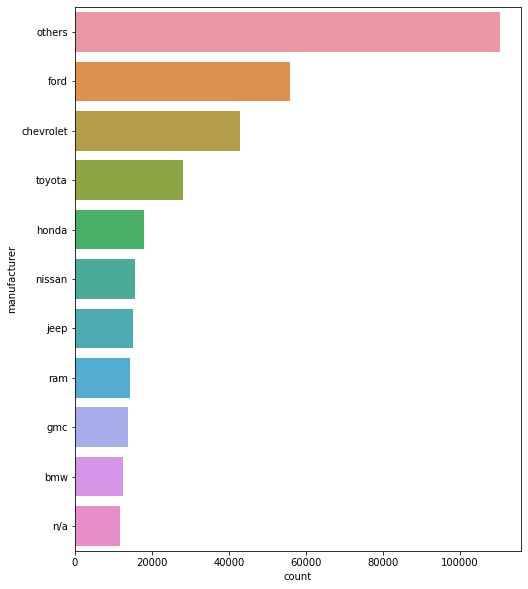

In [78]:
fig = plt.figure(figsize=(8, 10))
#팔린 차의 제조사 별로 팔린횟수 기준으로 내림차순한다
sns.countplot(y='manufacturer', data=df.fillna('n/a'), order=df.fillna('n/a')['manufacturer'].value_counts().index)

In [79]:
#모든 차의 모델을 다 출력해본다 ->굉장히 많음
for model, num in zip(df['model'].value_counts().index, df['model'].value_counts()):
  print(model, num)

  # num 이 1인 값 즉 한번밖에 안된값은 제대로 스크랩된 데이터가 대부분 아니다

others 306099
f-150 6499
silverado 1500 4061
1500 3494
camry 2593
accord 2512
silverado 2510
civic 2381
wrangler 2312
altima 2188


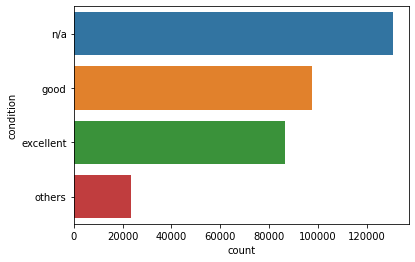

In [80]:
# new 도 na에 포함할지 생각해 봐야함
sns.countplot(y='condition', data=df.fillna('n/a'), order=df.fillna('n/a')['condition'].value_counts().index)

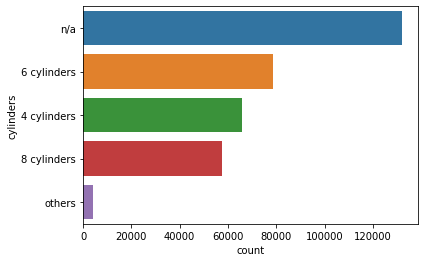

In [81]:
# 
sns.countplot(y='cylinders', data=df.fillna('n/a'), order=df.fillna('n/a')['cylinders'].value_counts().index)

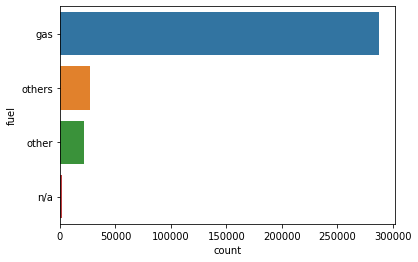

In [82]:
#웬만하면 gas 차 휘발유
sns.countplot(y='fuel', data=df.fillna('n/a'), order=df.fillna('n/a')['fuel'].value_counts().index)

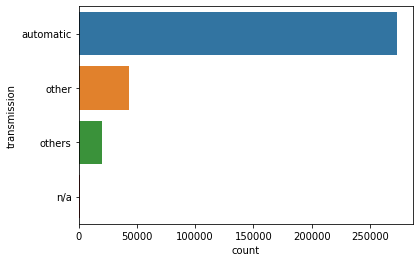

In [83]:
# 자동기어인 애들이 주로다

sns.countplot(y='transmission', data=df.fillna('n/a'), order=df.fillna('n/a')['transmission'].value_counts().index)

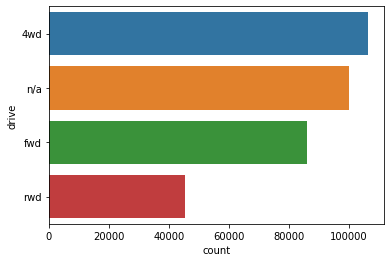

In [84]:
#4개가 다 비슷해서 그대로 써도 무난할듯
sns.countplot(y='drive', data=df.fillna('n/a'), order=df.fillna('n/a')['drive'].value_counts().index)

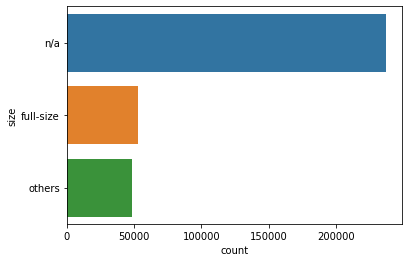

In [85]:
sns.countplot(y='size', data=df.fillna('n/a'), order=df.fillna('n/a')['size'].value_counts().index)

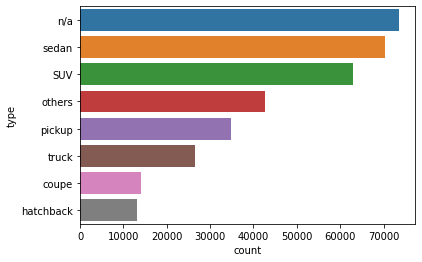

In [86]:

sns.countplot(y='type', data=df.fillna('n/a'), order=df.fillna('n/a')['type'].value_counts().index)

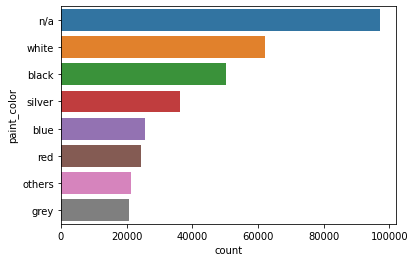

In [87]:
sns.countplot(y='paint_color', data=df.fillna('n/a'), order=df.fillna('n/a')['paint_color'].value_counts().index)

### 문제 6. 수치형 데이터의 통계 분석하기

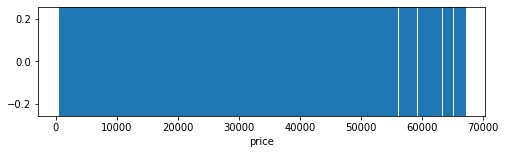

In [88]:
# 수치형 데이터의 값의 범위, 기초 통계 분석하기
# 수치형 데이터의 값의 범위, 기초 통계 분석하기
#box플랏으로 봣을때 좋은 결과가 안나옴
#
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='price', data=df, height=1)





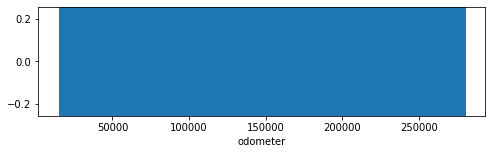

In [89]:
fig = plt.figure(figsize=(8, 2))
#outlier가 많아서 rugplot으로 해본다
sns.rugplot(x='odometer', data=df, height=1)

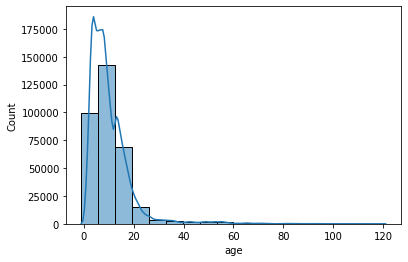

In [90]:
sns.histplot(x='age', data=df, bins=18, kde=True) #이건 무난하게 시각화가 됨

## Step 3. 데이터 클리닝 수행하기

### 문제 7. 범주형 데이터 시각화하여 분석하기

In [ ]:
# Boxplot 계열로 범주형 데이터를 시각화하여 분석하기
df.columns




Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'county', 'age'],
      dtype='object')

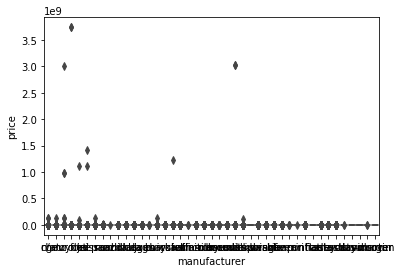

In [ ]:
sns.boxplot(x='manufacturer', y = 'price', data=df.fillna('n/a')) #알아보기 힘듬


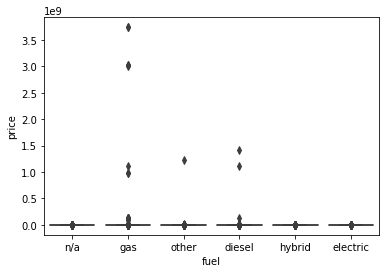

In [ ]:
sns.boxplot(x='fuel', y = 'price', data=df.fillna('n/a')) #아웃라이어가 너무 많음

### 문제 8. 범주형 데이터 클리닝하기

In [ ]:
# 범주형 데이터를 아래 방법 중 적절히 판단하여 처리하기
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
# 1. 결손 데이터가 포함된 Row를 제거
df['manufacturer'].fillna('others').value_counts() # 전체 기준을 제조사로 함

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
others             17646
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63


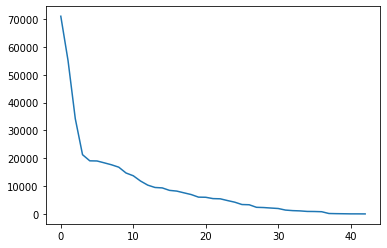

In [ ]:
col = 'manufacturer'
counts = df[col].fillna('others').value_counts() #결손값을 기타로 채운후 '제조사' 컬럼의 요소들 갯수를 파악
plt.plot(range(len(counts)),counts) #차가 많이 팔린 제조사로 내림 차운으로 선그래프가 나타남 (x축은 많이팔린 순위),(y축은 팔린 댓수)

In [ ]:
n_categorical = 10
counts.index[n_categorical:] #많이 팔린 상위 n개 그룹을 제외한 나머지
df[col] = df[col].apply(lambda s : s if str(s) not in counts.index[n_categorical:] else 'others')

In [ ]:
df[col].value_counts()

others       139807
ford          70985
chevrolet     55064
toyota        34202
honda         21269
nissan        19067
jeep          19014
ram           18342
gmc           16785
bmw           14699
Name: manufacturer, dtype: int64

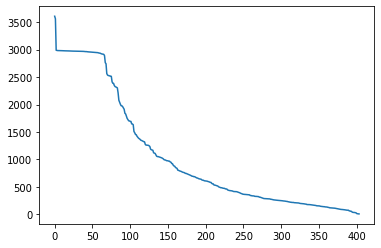

In [ ]:
#같은 방식
col = 'region'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)),counts) #5부터 급격한 감소

In [ ]:
n_categorical = 5
df[col] = df[col].apply(lambda s : s if str(s) not in counts.index[n_categorical:] else 'others')

In [ ]:
df[col].value_counts()

others                     410754
columbus                     3608
jacksonville                 3562
spokane / coeur d'alene      2988
eugene                       2985
orlando                      2983
Name: region, dtype: int64

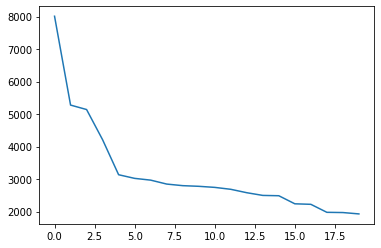

In [ ]:
col = 'model'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts[:20])),counts[:20]) #상위 10개만 해도 될듯

In [ ]:
n_categorical = 10
others =  counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others') #30000개를 일일이 처리하려면 힘드니 others를 따로 만들어서 한다

In [ ]:
df[col].value_counts()

others            386690
f-150               8009
silverado 1500      5140
1500                4211
camry               3135
silverado           3023
accord              2969
wrangler            2848
civic               2799
altima              2779
Name: model, dtype: int64

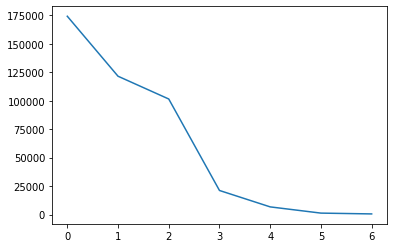

In [ ]:
col = 'condition'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)),counts) #5부터 급격한 감소

In [ ]:
n_categorical = 3
others =  counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')

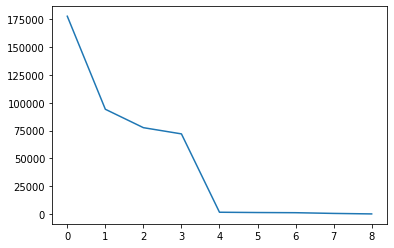

In [ ]:
col = 'cylinders'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)),counts)
n_categorical = 4
others =  counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')

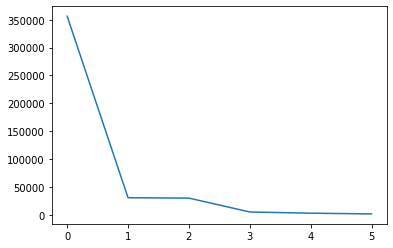

In [ ]:
col = 'fuel'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)),counts)
n_categorical = 2
others =  counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')

In [ ]:
# col = 'title_status'
# counts = df[col].fillna('others').value_counts()
# plt.plot(range(len(counts)),counts)
# n_categorical = 2
# others =  counts.index[n_categorical:]
df.drop('title_status',axis = 1, inplace = True)

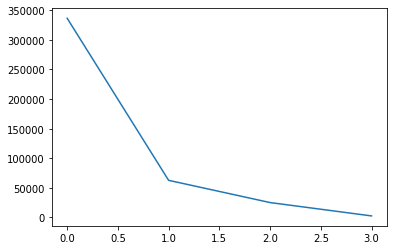

In [ ]:
col = 'transmission'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)),counts)


In [ ]:
n_categorical = 2
others =  counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')

4wd       131904
others    130567
fwd       105517
rwd        58892
Name: drive, dtype: int64

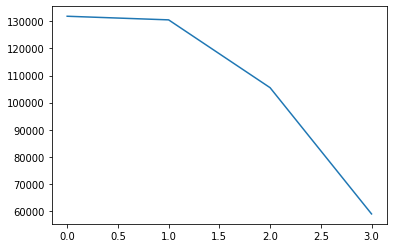

In [ ]:
col = 'drive'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)),counts)
#수정할 필요 없어보임
df[col].fillna('others').value_counts() #그래도 결측값은 확실히 추가해 놓는다

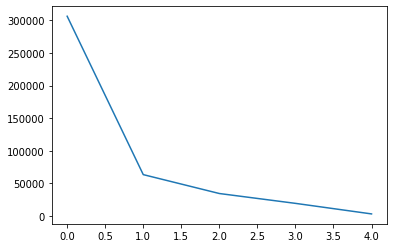

In [ ]:
col = 'size'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)),counts)


In [ ]:
n_categorical = 2
others =  counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')

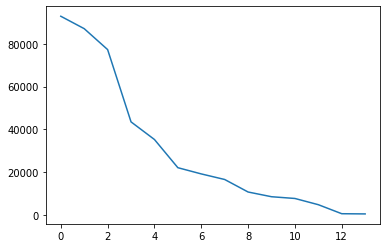

In [ ]:
col = 'type'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)),counts)
n_categorical = 8
others =  counts.index[n_categorical:]

In [ ]:
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')

In [ ]:

df.loc[df[col]=='other',col] = 'others'
df[col].value_counts() #other과 others를 합쳐준다

sedan        87056
SUV          77284
others       55091
pickup       43510
truck        35279
coupe        19204
hatchback    16598
Name: type, dtype: int64

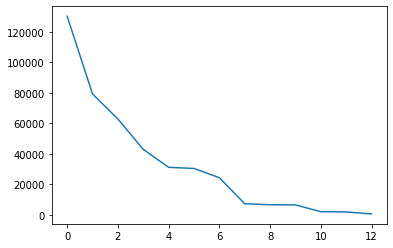

In [ ]:
col = 'paint_color'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)),counts)
n_categorical = 7
others =  counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')

In [ ]:
# 2. 결손 데이터를 others 범주로 변경하기

In [ ]:
# 3. 지나치게 소수로 이루어진 범주를 others 범주로 변경하기

In [ ]:
#(4. Classifier를 학습해서 결손 데이터 추정하여 채워넣기)

### 문제 9. 수치형 데이터 시각화하여 분석하기

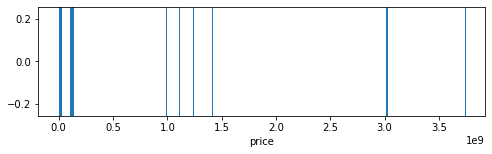

In [ ]:
# Seaborn을 이용하여 범주형 데이터를 시각화하여 분석하기
# Hint) 값의 범위가 너무 넓을 경우 histplot() 등이 잘 동작하지 않으므로, rugplot을 활용
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='price', data=df, height=1)



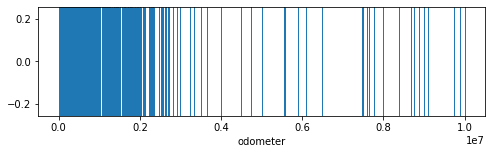

In [ ]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='odometer', data=df, height=1)

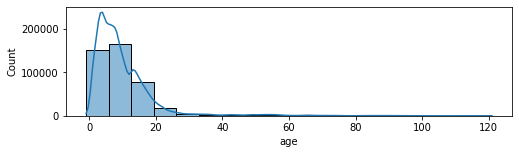

In [ ]:
fig = plt.figure(figsize=(8, 2))
sns.histplot(x='age', data=df, bins = 18,kde = True)

### 문제 10. 수치형 데이터 클리닝하기

In [ ]:
# quantile() 메소드를 이용하여 outlier 제거하고 시각화하여 확인하기

p1 = df['price'].quantile(0.99) #상위  1퍼센트 수치값 66995
 
p2 = df['price'].quantile(0.1) #하위 10퍼센트 500
p1,p2

(66995.0, 500.0)

In [ ]:
df = df[(p1 >df['price']) &(p2 <df['price'])]

In [ ]:
o1 = df['odometer'].quantile(0.99) #상위  1퍼센트 수치값 280000
 
o2 = df['odometer'].quantile(0.1) #하위 10퍼센트 14939

o1,o2

(280000.0, 14939.0)

In [ ]:
df = df[(o1 >df['odometer']) &(o2 <df['odometer'])]

In [ ]:
df.describe()

,id,price,odometer,county,lat,long,age
count,3.380730e+05,338073.000000,338073.000000,0.0,334931.000000,334931.000000,337457.000000
mean,7.311505e+09,17618.115265,100771.015355,NaN,38.584679,-94.208897,10.204921
std,4.371019e+06,12678.374523,57120.746792,NaN,5.808196,18.062098,8.489158
min,7.301583e+09,501.000000,14940.000000,NaN,-81.838232,-159.719900,-1.000000
25%,7.308148e+09,7495.000000,51933.000000,NaN,34.903460,-110.882900,5.000000
50%,7.312643e+09,14599.000000,96281.000000,NaN,39.337094,-88.018940,8.000000
75%,7.315247e+09,25590.000000,140000.000000,NaN,42.408600,-80.705457,13.000000
max,7.317101e+09,66992.000000,279974.000000,NaN,82.390818,167.629911,121.000000


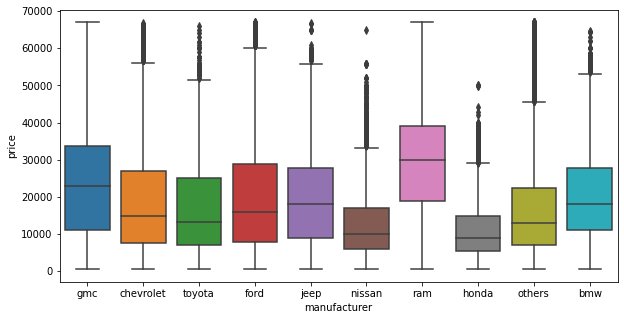

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x='manufacturer', y = 'price', data=df) #더 잘보임
# 값의 범위가 비슷함 (아웃라이어 포함) -> 얼마나 유용할지는 두고봐야할듯
# 그래도 상/하위 25프로(박스자체)만 볼때는 유용해 보이기도 함 통계적으로는

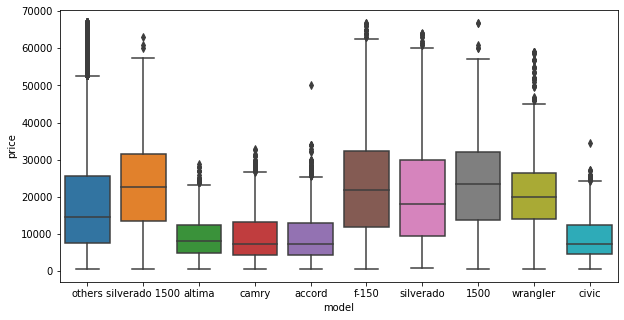

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x='model', y = 'price', data=df) #제조사보다 좀더 다이내믹함
#비싼보델일수록 확실히 높은 구간에 있음

### 문제 11. 컬럼간의 Correlation Heatmap으로 시각화하기

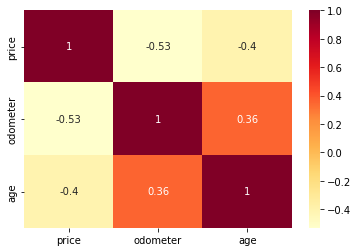

In [94]:

sns.heatmap(df.corr(), annot = True, cmap= 'YlOrRd') 
#odometer 와 차의 나이가 값에 악영향을 줌을 알 수 있다 
#odometer 와 age가 상관관계가 있어보임 -> 둘의 콜라보는 좋지 않을지 몰라도 좋은 feature로서의 역할은 하긴할듯





## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기


In [99]:
from sklearn.preprocessing import StandardScaler

In [102]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
X_num = df[['odometer','age']]
scalar = StandardScaler()
scalar.fit(X_num)
X_scaled = scalar.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index = X_num.index, columns=X_num.columns)


# get_dummies를 이용해 범주형 데이터를 one-hot 벡터로 변경하기
X_cat = df.drop(['price','odometer','age'],axis = 1)
X_cat = pd.get_dummies(X_cat) #linear regression은 안하므로 drop first는 안한다

# 입출력 데이터 통합하기
X = pd.concat([X_scaled, X_cat],axis =1 )
y = df['price']

In [105]:
X.head()


(338073, 60)

In [ ]:
X.shape

In [107]:
X.isna().sum()
#age가 결측값이 있음
X.fillna(0.0,inplace=True) #age가 이미 표준화된 값이라 굳이 평균값을 안집어넣어도됨

### 문제 13. 학습데이터와 테스트데이터 분리하기


In [109]:
from sklearn.model_selection import train_test_split

In [110]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 1)

## Step 5. Regression 모델 학습하기

### 문제 14. XGBoost Regression 모델 학습하기

In [112]:
from xgboost import XGBRegressor

In [114]:
# XGBRegressor 모델 생성/학습
model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)




[11:55:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 문제 15. 모델 학습 결과 평가하기

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [116]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test,pred)) 
print(sqrt(mean_squared_error(y_test,pred))) #에러값 제곱하고 평균을 낸후 루트를 씌움 (rmse)
#에러값들이 상당히 크다




4534.66922119133
6705.960062660244


## Step 6. 모델 학습 결과 심화 분석하기


### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


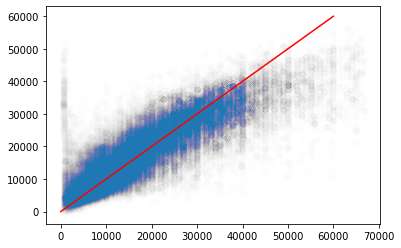

In [120]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
# Hint) Scatter로 시각적 확인이 어려울 경우, histplot 등 활용

plt.scatter(x=y_test,y=pred,alpha = 0.005) #alpha를 조절해서 겹치는게 적은 부분을 옅게표현
plt.plot([0,60000],[0,60000],'r-')

#값이 낮은 차들은 y = x축에 잘 형성된걸보니 잘 분석이 되었다
#근데 실제로 아주 값이 작은 차는 학습모델에선 매우 비싸게 예측됨
#그리고 차가 비쌀때 (4만불이상)은 실제보다 가격이 낮다고 측정됨



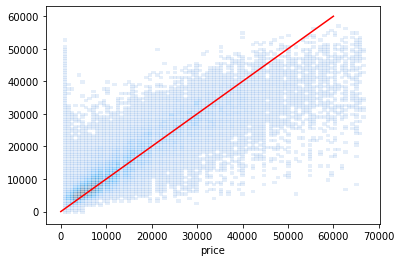

In [129]:
sns.histplot(x=y_test,y=pred)
plt.plot([0,60000],[0,60000],'r-')

### 문제 17. 에러 값의 히스토그램 확인하기


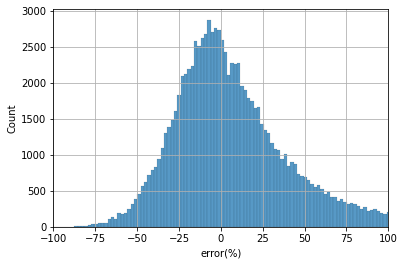

In [127]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = (pred - y_test) / y_test *100
sns.histplot(err[err<600]) #에러율이 6보다 작은애들
plt.xlabel('error(%)')
plt.xlim(-100,100)
plt.grid()

#값이 0보다 약간 왼쪽으로 치우져져있다 -> underestimated 되어있다
#예상 보다 낮게 측정될때는 -100%까지 가진 않는다
#예상 보다 높게 측정될때는 +100%를 웃도는 경우도 있다 -> 에러율이 아주높은 애들이 있다

plt.show()

#에러율 0근처에 값이 몰려있을수록 잘학습된 모델이다
#안좋을수록 좌우로 퍼짐

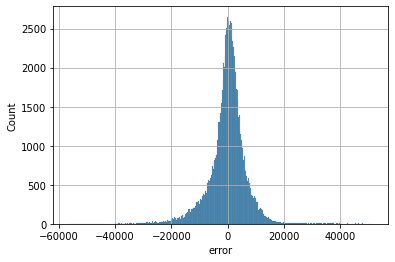

In [130]:
err = (pred - y_test)
sns.histplot(err) #에러율이 6보다 작은애들
plt.xlabel('error($)')

plt.grid()

#에러값 자체로만 봤을 땐 0기준으로 정돈되어 나타나 있다

In [ ]:
#성능개선 아이디어
# 범주형 데이터 클리닝시 
# model의 경우 이름이 다양하니까 대문자,소문자 둘중하나로 다 맞춘후 other로 빠지는 값을 최대한 줄여본다
# 또는 model명을 표준화해서 조금씩 다르게 표현된 모델명을 하나로 맞춰주는 작업을 해줘도 좋을듯
# 가격을 표준화를 많이 시켜서 저가,고가로 나누는게 아니라 좀더 잘 나눴으면 좋앗을지도